In [4]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import requests

In [5]:
url = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'

r = requests.get(url)
with open('dados/wine.csv', 'wb') as f:
    f.write(r.content)
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv')
print(f'O dado possui {df.shape[0]} amostras e {df.shape[1]} atributos')
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
a_renomear = {
    'Alcohol' : 'Alcool',
    'Ash_Alcanity' : "Alcalinidade_po",
    'Magnesium' : 'Magnesio',
    'Color_Intensity' : 'Intensidade_de_cor',
    'Ash' : 'Po'
}
df.rename(columns = a_renomear, inplace=True)
df.head()


,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
matriz_correlacao = df.corr()
matriz_correlacao

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 


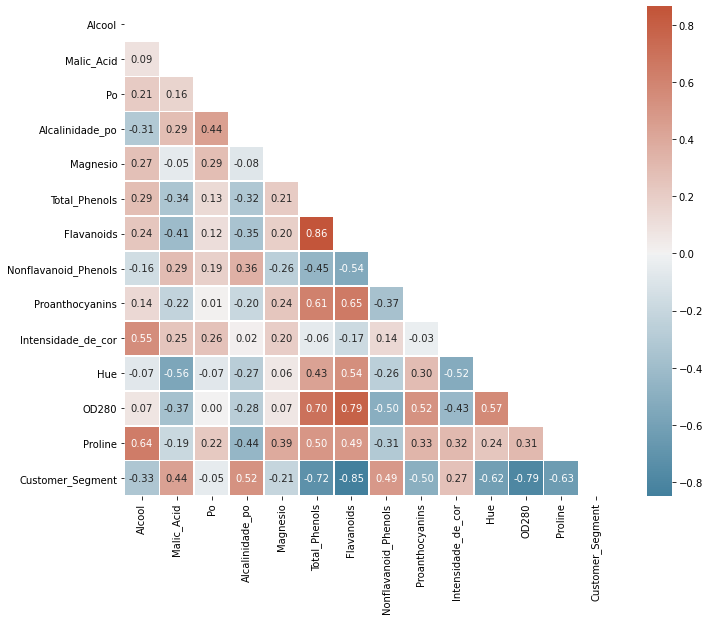

In [10]:
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(matriz_correlacao, annot=True, fmt = '.2f', mask=mask, center=0, linewidths=.5, square=True, cmap=cmap)



ax.figure.set_size_inches(12, 9)

In [11]:
features = df.columns

for feature in features:
    df[feature] = (df[feature] - min(df[feature]))/(max(df[feature]) - min(df[feature]))
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [12]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn import preprocessing

df = pd.read_csv(url)
df.rename(columns = a_renomear, inplace=True)


min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = df.columns)
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [14]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
np_df = min_max_scaler.inverse_transform(df)
df = pd.DataFrame(np_df, columns = df.columns)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [16]:
from sklearn.cluster import KMeans

normalizador = preprocessing.StandardScaler()
np_df = normalizador.fit_transform(df)
dados_normalizados = pd.DataFrame(np_df, columns = df.columns)

agrupador = KMeans(n_clusters=4)
agrupador.fit(dados_normalizados)

labels = agrupador.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1
 1 0 0 0 1 1 0 1 0 3 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [17]:
trace1 = go.Scatter(x = dados_normalizados['Intensidade_de_cor'], y  = dados_normalizados['Alcool'],
                    mode = 'markers', marker= dict(color = agrupador.labels_.astype(np.float)),
                    text=labels)

traces = [trace1]

fig = go.Figure(traces)
fig.show()

In [18]:
df = pd.read_csv(url)
df.rename(columns = a_renomear, inplace=True)

agrupador = KMeans(n_clusters=3)
agrupador.fit(dados_normalizados)

labels = agrupador.labels_

fig = go.Figure()


fig.update_layout(title='Grupos de vinhos',
                  title_font_size = 30,
                  xaxis = dict(
                    title='Intensidade de cor',
                    title_font_size = 20
                  ),
                  yaxis = dict(
                    title = 'Taxa de Alcool',
                    title_font_size = 20
                  ))

vinhos_agrupados = df.copy()
vinhos_agrupados['grupos'] = labels
for grupo, conjunto in vinhos_agrupados.groupby('grupos'):
    fig.add_scatter(x = conjunto.Intensidade_de_cor, y = conjunto.Alcool, name = grupo,
    mode = 'markers')

fig.show()



In [19]:
fig = go.Figure()


for grupo, conjunto in vinhos_agrupados.groupby('grupos'):
    fig.add_scatter3d(x = conjunto.Intensidade_de_cor, 
                    y = conjunto.Alcool, 
                    z = conjunto.Proline,
                    name = grupo,
                    mode = 'markers')

fig.update_layout(title = 'Grupo de vinhos',
    title_font_size = 30,
    scene = dict(xaxis_title = 'Intensidade de cor',
        yaxis_title = 'Teor Alcolico',
        zaxis_title = 'Proline')
)

In [20]:
fig.write_html('graph.html')

In [21]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = vinhos_agrupados.columns[:-1]
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347,-1.171521
1,-0.922126,-0.378889,-0.465688,0.175507,-0.470251,-0.073934,0.044288,0.008761,0.018265,-0.862278,0.424503,0.249782,-0.765250,0.079960
2,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045,1.347458


# DBSCAN

In [123]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps = 3, min_samples=15, metric='euclidean')
agrupador.fit(dados_normalizados)

DBSCAN(eps=3, min_samples=15)

In [124]:
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

<br> O DBSCAN não funciona muito bem com dados com muitas features, pois ele verifica a distancia entre cada ponto.
<br> Ele funciona bem com dados que apresentam ruidos e simetria não radial.

# Mean-Shift

In [133]:
from sklearn.cluster import MeanShift

agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

## **Vantagens**
<br> K-Means não apresenta bom desempenho em dados com ruído e grupos de simetria Não radial
<br> Mais simples de ser utilizado ao comparar com DBSCAN devido a falta de necesidade de parametros a serem ajustados.
<br> Robusto a outliers
## **Desvantagens**
<br> Não funciona bem com dados de alta dimensionalidade
<br> Custo computacional alto

In [146]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(df, quantile=0.3)

agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Avaliação modelos

## Descobrindo melhor número de clusteres atraves do coeficiente de silhueta no KMeans

In [147]:
agrupador = KMeans(n_clusters=5)
agrupador.fit(dados_normalizados)
agrupador.labels_

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 4, 0, 0, 4, 3,
       0, 0, 4, 0, 4, 3, 0, 3, 3, 0, 0, 4, 0, 3, 0, 0, 4, 4, 3, 0, 4, 4,
       4, 4, 4, 4, 4, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 4, 0, 4, 0, 3,
       3, 0, 4, 4, 4, 4, 0, 0, 4, 0, 3, 3, 3, 3, 3, 0, 3, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [150]:
labels = agrupador.labels_

fig = go.Figure()


fig.update_layout(title = 'Grupo de vinhos',
    title_font_size = 30,
    scene = dict(xaxis_title = 'Intensidade de cor',
                 yaxis_title = 'Teor Alcolico',
                 zaxis_title = 'Proline')
)

vinhos_agrupados = df.copy()
vinhos_agrupados['grupos'] = labels
for grupo, conjunto in vinhos_agrupados.groupby('grupos'):
    fig.add_scatter3d(x = conjunto.Intensidade_de_cor, 
                    y = conjunto.Alcool, 
                    z = conjunto.Proline,
                    name = grupo,
                    mode = 'markers')

fig.show()

In [186]:
from sklearn.metrics import silhouette_score

faixa_n_clusters = [i for i in range(2,10)]

valor_silhueta = []

for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters=k)
    labels = agrupador.fit_predict(dados_normalizados)
    media_silhueta = silhouette_score(dados_normalizados, labels)
    valor_silhueta.append(media_silhueta)

In [187]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valor_silhueta))
fig.update_layout(
    title = 'Valores de silhuetas no KMeans',
    xaxis_title = 'Numero de clusters',
    xaxis_tickmode = 'linear',
    yaxis_title = 'Media silhueta'
)

O melhor valor é 3

## Descobrindo o melhor quantile para o Mean-Shift

In [189]:
faixa_quantils = np.linspace(0.02, 0.8, 50)

valores_silhuetas = []
quantil_plot = []

for quantil in faixa_quantils:
    bandwidth = estimate_bandwidth(dados_normalizados, quantil)
    agrupador = MeanShift(bandwidth)
    labels = agrupador.fit_predict(dados_normalizados)
    
    if( len(np.unique(labels)) < len(dados_normalizados) and len(np.unique(labels)) > 1):
        media_silhueta = silhouette_score(dados_normalizados, labels)
        valores_silhuetas.append(media_silhueta)
        quantil_plot.append(quantil)

fig = go.Figure()

fig.add_trace(go.Scatter(x = quantil_plot, y = valores_silhuetas))
fig.update_layout(
    title = 'Valores de silhuetas no Mean-Shift',
    xaxis_title = 'Quantil',
    yaxis_title = 'Media silhueta'
)
fig.show()

## Descobrindo os melhores parametros para DBSCAN

In [211]:
from collections import Counter

#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

valores_silhueta = []
eps_plot = []
min_samples_plot = []
for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(dados_normalizados)
    labels = agrupador.labels_
    if(Counter(labels)[0] < len(dados_normalizados) and Counter(labels)[0] > 1): #porque não é possível calcular
    # silhueta para apenas  um cluster ou para número de clústeres igual
    # ao número de dados 
      media_silhueta = silhouette_score(dados_normalizados, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)


ind = valores_silhueta.index(max(valores_silhueta))
#@title Default title text
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                         y = [eps_plot[ind]], z = [max(valores_silhueta)],
                         mode = 'markers',marker_line_color="midnightblue", 
                          marker_symbol=['x']))
fig.add_trace(go.Scatter3d(x=min_samples_plot,
                         y = eps_plot, z = valores_silhueta,
                         mode = 'markers',
                        text = labels))
fig.update_layout(scene = dict(
                    xaxis_title='eps',
                    yaxis_title='min_samples',
                    zaxis_title='silhueta'))
fig.show()



In [212]:
# pega o índice do vamior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))
# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print('Melhor EPS: ', eps_plot[ind])
print('Melhor número de amostras: ', min_samples_plot[ind])

print('Melhor coeficiente de silhueta: ',max(valores_silhueta))

Melhor EPS:  9.5
Melhor número de amostras:  26
Melhor coeficiente de silhueta:  0.2691068771020587


## Comparando os agrupadores

In [213]:
agrupador_kemans = KMeans(n_clusters=3)
agrupador_dbscan = DBSCAN(eps = 9.5, min_samples=26, metric = 'manhattan')

BW = estimate_bandwidth(dados_normalizados, quantile=0.1314)
agrupador_meanshift = MeanShift(BW)

labels_kmeans = agrupador_kemans.fit_predict(dados_normalizados)
labels_dbscan = agrupador_dbscan.fit_predict(dados_normalizados)
labels_meanshift = agrupador_meanshift.fit_predict(dados_normalizados)

print(
    f'Labels KMeans {labels_kmeans} \nLabels dbscan {labels_dbscan} \n Labels meanshift {labels_meanshift}'
)

Labels KMeans [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 
Labels dbscan [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0 -1 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1] 
 Labels meanshift [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [214]:
print(f'O coeficiente de silhueta do KMeans é {silhouette_score(dados_normalizados, labels_kmeans)}')
print(f'O coeficiente de silhueta do DBSCAN é {silhouette_score(dados_normalizados, labels_dbscan)}')
print(f'O coeficiente de silhueta do Mean-Shift é {silhouette_score(dados_normalizados, labels_meanshift)}')


O coeficiente de silhueta do KMeans é 0.30773604383565206
O coeficiente de silhueta do DBSCAN é 0.2691068771020587
O coeficiente de silhueta do Mean-Shift é 0.26272971236075027
